### IS727272 - Cordero Hernández, Marco Ricardo

# Exercise 4.1.6 Bike Sharing Hourly, Linear Regression, Ridge

The regression model is a statistical procedure that allows a researcher to estimate the linear, or straight line, relationship that relates two or more variables.

Sometimes the linear regression models tends to overfit the datasets, it causes that the model can not generalize the learning.

For this reason there is an algorithm type called Regularized GD.

This algorithm consists in penalizing some w's coefficients to allow the model generalize the learning. 

### Instructions:

1. Load the Bike-sharing hourly dataset
2. Drop the columns ['instant', 'dteday', 'casual', 'registered']
3. Verify that there are not null values
4. Convert to numpy matrix the attributes and the ouput 'cnt' 
5. Add the columns of number 1
6. Split the dataset into Training and Testing sets
7. Using the xTrain and yTrain (Training dataset) and Linear Regression function from sklearn library, obtain the model (W's). Then make predictions using the Testing dataset, and obtain the $R^2$ score of your predictions.
8. Using Ridge function from sklearn library, obtain the model (W's) and then make predictions using the Testing dataset, and obtain the $R^2$ score of your predictions.
9. Incrementar el valor de alfa de forma logaritmica: 10, 100, 1000, 10000, 100000, 1e6, 1e7. Graficar el comportamiento del score del ridge para cada valor de alpha

## 1. Preparing data

In [1]:
# Import libraries
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df_hour = pd.read_csv('./Datasets/hourly.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# Verify that there are not null values
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
# Drop the columns ['instant', 'dteday', 'casual', 'registered']

df_hour = df_hour.drop(columns = ['instant', 'dteday', 'casual', 'registered'])
#df_hour = df_hour.drop(['instant', 'dteday', 'casual', 'registered'], inplace = True, axis = 1)

In [5]:
# Convert to numpy matrix the attributes and the ouput 'cnt'
dataset = np.array(df_hour)
m, n = np.shape(dataset)
x = dataset[:, 0:n-1]
y = dataset[:, -1]

# Reshape the output
y = y.reshape(m, 1)
print('X shape: ', np.shape(x), 'Y shape: ', np.shape(y))

X shape:  (17379, 12) Y shape:  (17379, 1)


In [6]:
# Add the columns of number 1

def addones(X):
    X1 = np.array(X)
    m, n = np.shape(X1)
    ones = np.ones((m, 1))
    X1 = np.concatenate((ones, X1), axis = 1)
    
    return X1

x = addones(x)

In [7]:
# Split the dataset into Training and Testing sets, test size of 33%, and random_state= 1

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 1)
print('Shape of Training data: ', np.shape(X_train), np.shape(y_train))
print('Shape of Testing data: ', np.shape(X_test), np.shape(y_test))

Shape of Training data:  (11643, 13) (11643, 1)
Shape of Testing data:  (5736, 13) (5736, 1)


## 2. Normal Linear Regression

In [8]:
# Using the xTrain and yTrain (Training dataset) and Linear Regression function from sklearn library, obtain the model (W's). 
# Then make predictions using the Testing dataset, and obtain the  𝑅2  score of your predictions.

from sklearn.linear_model import LinearRegression
# Fit the data to training dataset
reg = LinearRegression().fit(X_train, y_train)

# Obtain and print the score 
Costo = reg.score(X_test, y_test)
print(f'Error (R2): {Costo}')

# Obtain and print the W's coefficients
w = reg.coef_
print(f'W: {w}')

# Obtain and print the intercept
intercepto = reg.intercept_
print(f'W0: {intercepto}')

# Add the intercept value to the W's array and print W
w[0][0] = intercepto
print(w)

Error (R2): 0.3966400174284631
W: [[ 0.00000000e+00  1.85126892e+01  7.81151861e+01  1.71585299e-01
   7.63881341e+00 -2.70804291e+01  1.66918680e+00  3.92795159e+00
  -2.72936547e+00  2.10019998e+01  2.96443537e+02 -1.98320492e+02
   4.29975972e+01]]
W0: [-24.62175314]
[[-2.46217531e+01  1.85126892e+01  7.81151861e+01  1.71585299e-01
   7.63881341e+00 -2.70804291e+01  1.66918680e+00  3.92795159e+00
  -2.72936547e+00  2.10019998e+01  2.96443537e+02 -1.98320492e+02
   4.29975972e+01]]


## Implement $R^2$ Score

$$R^2 = 1 - \frac{\sum(y_i - \hat{y}_i)^2}{\sum(y_i - \bar{y})^2 }$$


In [9]:
def r2(Y, Yt):
    
    error = Y - Yt
    varianza = (Y - np.average(Y)) ** 2
    cost = 1 - (np.sum(error ** 2)) / np.sum(varianza)
    
    return cost
                
# Predictions for Testing dataset
yt = np.dot(w, X_test.T).T
print(np.shape(yt))

# Obtain and print the R2 score
costo = r2(y_test, yt)
print(costo)

(5736, 1)
0.3966400174284632


## 3. Gradient Descent with Regularization (Ridge)

Cost function for Gradient Descent Regularized:
$$
J(w) = \frac{1}{2m}\big[\sum_{i=1}^{m}(\hat y^{(i)}-y^{(i)})^2+\lambda\sum_{j=1}^{n}w_j^2 \big]
$$

W's update for GD Regularized:
$$
w_0 = w_0 - \alpha \frac{1}{m}\sum_{i=1}^{m}(\hat y^{(i)}-y^{(i)})x_0^{(i)}
$$
$$
w_j = w_j - \alpha \frac{1}{m} \big [ \sum_{i=1}^{m}(\hat y^{(i)}-y^{(i)})x_j^{(i)} + \frac{\lambda}{m}w_j \big ]
$$

In [10]:
# Linear regression con regularizacion "Ridge"
# Using Ridge function from sklearn library, obtain the model (W's) and then make predictions using the Testing dataset
# and obtain the  𝑅2  score of your predictions.

from sklearn.linear_model import Ridge

# Define the clf method using alpha = 10
clf = Ridge(alpha = 10.0)

# Fit to the training dataset
ridge = clf.fit(X_train, y_train)

# Obtain and print the score 
Score2 = ridge.score(X_test, y_test)
print(f'R2: {Score2}')

# Obtain and print the W's coefficients
w2 = ridge.coef_
print(w2)

# Obtain and print the intercept
intercepto2 = ridge.intercept_
print(intercepto2)

# Add the intercept value to the W's array and print W
w2[0][0] = intercepto2
print(w2)

R2: 0.3970991495935524
[[ 0.00000000e+00  1.87979917e+01  7.80755631e+01  9.04443011e-02
   7.71497657e+00 -2.68777527e+01  1.63243838e+00  4.00689450e+00
  -3.80801447e+00  1.17850923e+02  1.82814798e+02 -1.91233474e+02
   3.74355198e+01]]
[-21.55152971]
[[-2.15515297e+01  1.87979917e+01  7.80755631e+01  9.04443011e-02
   7.71497657e+00 -2.68777527e+01  1.63243838e+00  4.00689450e+00
  -3.80801447e+00  1.17850923e+02  1.82814798e+02 -1.91233474e+02
   3.74355198e+01]]


In [11]:
# Predictions for Testing dataset for Ridge algorithm
yt2 = np.dot(w2, X_test.T).T
print(np.shape(yt2))

# Obtain and print the R2 score for Ridge Algorithm
costo2 = r2(y_test, yt2)
print(costo2)

(5736, 1)
0.3970991495935524


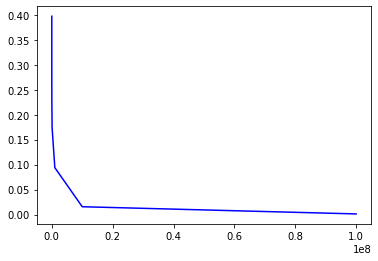

In [12]:
#Incrementar el valor de alfa de forma logaritmica: 10, 100, 1000, 10000, 100000, 1e6, 1e7
#Graficar el comportamiento del score del ridge para cada valor de alpha

alphas = [10, 100, 1000, 10000, 100000, 1e6, 1e7, 1e8]
J = []


for a in alphas:
    # Define the clf method using distinct alphas
    clf = Ridge(alpha = a)

    # Fit to the training dataset
    ridge = clf.fit(X_train, y_train)

    # Obtain and print the score 
    Score = ridge.score(X_test, y_test)

    # Obtain and print the W's coefficients
    w = ridge.coef_

    # Obtain and print the intercept
    intercepto = ridge.intercept_

    # Add the intercept value to the W's array and print W
    w[0][0] = intercepto
    
    # Predictions for Testing dataset for Ridge algorithm
    yt = np.dot(w, X_test.T).T

    # Obtain and print the R2 score for Ridge Algorithm
    costo = r2(y_test, yt)
    
    J.append(costo)

    
plt.plot(alphas, J, 'b')

# TAREA

1. Utilizar el dataset: https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction, y hacer los mismos pasos. 

NOTA: La salida es Appliances en la columna 2, y borrar la columna de fechas de la columna 1.